**Advanced programming and Master Data Science**


BATCH NO: DW09

TASK: 07

Assignment No:10

NAME: T Prashant

You are provided with a dataset from USA Forensic Science Service
which has description of 6 types of glass; defined in terms of their
oxide content (i.e. Na, Fe, K, etc). Your task is to use K-Nearest
Neighbor (KNN) classifier to classify the glasses.

The original dataset is available at


(https://archive.ics.uci.edu/ml/datasets/glass+identification). For
detailed description on the attributes of the dataset,

please refer to the original link of the dataset in the UCI ML
repository.

But the shared drive folder have the dataset for your convenience


perform exploratory data analysis on the dataset using Python Pandas,
including dropping irrelevant fields for predicted values, and
standardization of each attribute.

Following data cleaning, two Scikit-Learn KNN models should be created
for two different distance metrics: Square Euclidean and Manhattan
distance. The performance of the two models using different distance
metrics should be compared in terms of accuracy to the test data and
Scikit-Learn Classification Report.

# Attribute Information:

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8. Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)
-- 1 building_windows_float_processed
-- 2 building_windows_non_float_processed
-- 3 vehicle_windows_float_processed
-- 4 vehicle_windows_non_float_processed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [2]:
train = pd.read_csv("trainKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')

test = pd.read_csv("testKNN.txt" , header=None,
                 names=["Id number", "RI", "Na", "Mg", "Al", "Si","K","Ca","Ba",'Fe','Type of glass'],index_col='Id number')


In [3]:
train.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
test.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id number,,,,,,,,,,
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.0,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.0,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.0,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.0,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2


In [5]:
print(train.shape)
print(test.shape)

(196, 10)
(18, 10)


In [6]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [7]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 68 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             18 non-null     float64
 1   Na             18 non-null     float64
 2   Mg             18 non-null     float64
 3   Al             18 non-null     float64
 4   Si             18 non-null     float64
 5   K              18 non-null     float64
 6   Ca             18 non-null     float64
 7   Ba             18 non-null     float64
 8   Fe             18 non-null     float64
 9   Type of glass  18 non-null     int64  
dtypes: float64(9), int64(1)
memory usage: 1.5 KB
None


In [8]:
train.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [9]:
test.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [10]:
x=train.drop(columns='Type of glass')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


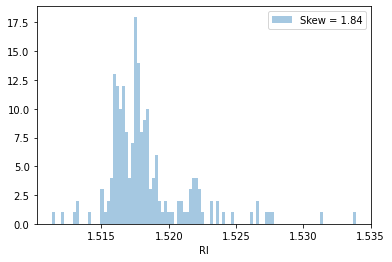

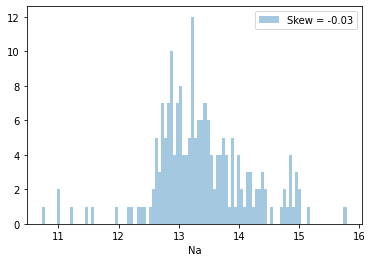

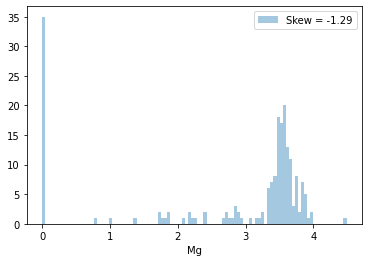

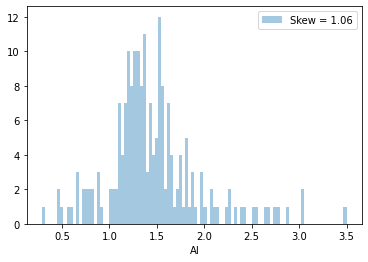

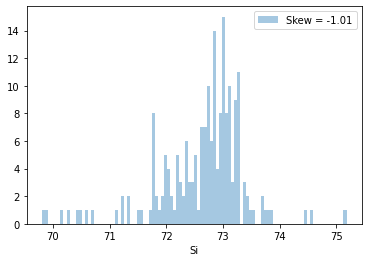

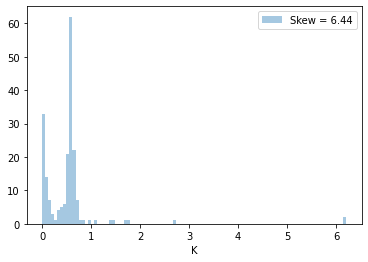

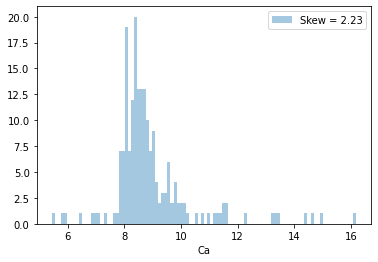

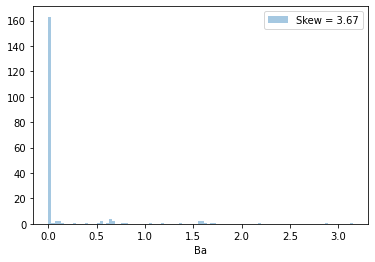

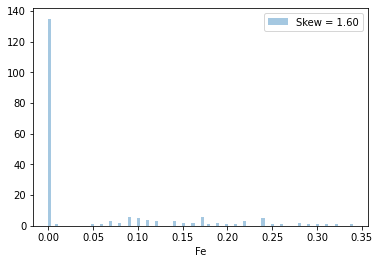

In [11]:
for col in x:
    skew = train[col].skew()
    sns.distplot(train[col],kde=False,label='Skew = %.2f' %(skew),bins=100)
    plt.legend(loc='best')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


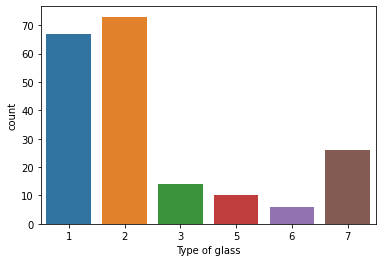

In [12]:
sns.countplot(train['Type of glass'])

# **Train Model**

In [13]:
x_train = train.drop(columns=['Type of glass',],axis=1)

x_test = test.drop(columns=['Type of glass'],axis=1)


y_train = train['Type of glass']

y_test = test['Type of glass']

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Euclidean Metric

In [15]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='euclidean', p=2 )  
classifier.fit(x_train, y_train)  
KNeighborsClassifier(metric='euclidean')
euclid_pred = classifier.predict(x_test)
euclid_score = accuracy_score(y_test,euclid_pred)
euclid_score = euclid_score*100

print("Accuracy Score of Euclidean Metric : \t ",euclid_score)

Accuracy Score of Euclidean Metric : 	  55.55555555555556


In [16]:
classifier.score(x_test,y_test)*100

55.55555555555556

# **Manhatten Matrix**

In [17]:
classifier= KNeighborsClassifier(metric='manhattan')  
classifier.fit(x_train, y_train)

KNeighborsClassifier(metric='manhattan')

In [18]:
manhat_pred = classifier.predict(x_test)
manhat_score= accuracy_score(y_test,manhat_pred)*100
print("Accuracy score of Manhattan metric : \t ",manhat_score)

Accuracy score of Manhattan metric : 	  55.55555555555556


In [19]:
print(classification_report(y_test,manhat_pred))

              precision    recall  f1-score   support

           1       0.43      1.00      0.60         3
           2       0.40      0.67      0.50         3
           3       0.00      0.00      0.00         3
           5       1.00      0.33      0.50         3
           6       1.00      0.33      0.50         3
           7       0.75      1.00      0.86         3

    accuracy                           0.56        18
   macro avg       0.60      0.56      0.49        18
weighted avg       0.60      0.56      0.49        18



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
